In [1]:
#use L-2 MODIS A DATA 
#in accordance with Fang et al. 2018 
#Algorithim for CDOM and DOC that semms good 
import xarray as xr # top library for manipulating netcdf files
import netCDF4 # more basic library for manipulating netcdf files, used for exploring
import glob #to get file names
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np
import cmocean
import cmocean.cm as cmo
from glob import glob
%matplotlib inline

In [2]:
filenames = glob('../../SAT_DATA/NC/OC_APRIL_L2_MODIS_A//*.L2_LAC_OC.x.nc')
filenames.sort()
filenames

['../../SAT_DATA/NC/OC_APRIL_L2_MODIS_A\\A2022107185000.L2_LAC_OC.x.nc',
 '../../SAT_DATA/NC/OC_APRIL_L2_MODIS_A\\A2022107185500.L2_LAC_OC.x.nc',
 '../../SAT_DATA/NC/OC_APRIL_L2_MODIS_A\\A2022107203000.L2_LAC_OC.x.nc',
 '../../SAT_DATA/NC/OC_APRIL_L2_MODIS_A\\A2022107203500.L2_LAC_OC.x.nc',
 '../../SAT_DATA/NC/OC_APRIL_L2_MODIS_A\\A2022108180000.L2_LAC_OC.x.nc',
 '../../SAT_DATA/NC/OC_APRIL_L2_MODIS_A\\A2022108193500.L2_LAC_OC.x.nc',
 '../../SAT_DATA/NC/OC_APRIL_L2_MODIS_A\\A2022108194000.L2_LAC_OC.x.nc',
 '../../SAT_DATA/NC/OC_APRIL_L2_MODIS_A\\A2022109184000.L2_LAC_OC.x.nc',
 '../../SAT_DATA/NC/OC_APRIL_L2_MODIS_A\\A2022109184500.L2_LAC_OC.x.nc',
 '../../SAT_DATA/NC/OC_APRIL_L2_MODIS_A\\A2022109202000.L2_LAC_OC.x.nc',
 '../../SAT_DATA/NC/OC_APRIL_L2_MODIS_A\\A2022110192000.L2_LAC_OC.x.nc',
 '../../SAT_DATA/NC/OC_APRIL_L2_MODIS_A\\A2022110192500.L2_LAC_OC.x.nc',
 '../../SAT_DATA/NC/OC_APRIL_L2_MODIS_A\\A2022111183000.L2_LAC_OC.x.nc',
 '../../SAT_DATA/NC/OC_APRIL_L2_MODIS_A\\A202211120

In [3]:
path = filenames[0]

In [4]:
def load_satdata(path):
    data = xr.open_dataset(path, group='geophysical_data')
    navigation = xr.open_dataset(path, group='navigation_data')
    navigation = navigation.rename({'pixel_control_points': 'pixels_per_line'})
    mask = (~navigation['latitude'].isnull()) & (~navigation['longitude'].isnull())
    data = data.where(mask, drop=True)
    data['lat'] = navigation['latitude'].where(mask, drop=True)
    data['lon'] = navigation['longitude'].where(mask, drop=True)
    return data

ds = load_satdata(path)
ds

<xarray.Dataset>
Dimensions:   (number_of_lines: 468, pixels_per_line: 872)
Dimensions without coordinates: number_of_lines, pixels_per_line
Data variables: (12/23)
    aot_869   (number_of_lines, pixels_per_line) float32 nan nan ... 0.0949
    angstrom  (number_of_lines, pixels_per_line) float32 nan nan ... 1.662 1.642
    Rrs_412   (number_of_lines, pixels_per_line) float32 nan nan ... 0.007814
    Rrs_443   (number_of_lines, pixels_per_line) float32 nan nan ... 0.008102
    Rrs_469   (number_of_lines, pixels_per_line) float32 nan nan ... 0.007058
    Rrs_488   (number_of_lines, pixels_per_line) float32 nan nan ... 0.006678
    ...        ...
    ipar      (number_of_lines, pixels_per_line) float32 nan nan ... 0.002114
    nflh      (number_of_lines, pixels_per_line) float32 nan nan ... -0.00641
    par       (number_of_lines, pixels_per_line) float32 54.92 58.59 ... 58.75
    l2_flags  (number_of_lines, pixels_per_line) float64 1.074e+09 ... 5.369e+08
    lat       (number_of_lines, pixels_per_line) float32 17.56 17.56 ... 19.56
    lon       (number_of_lines, pixels_per_line) float32 -79.78 ... -93.54

In [5]:
def make_vars(ds):

    #HERE WE CALCUTE CDOM WITH THE ALGORITHUM WITH 
    #Mannino et al. 2015
    
    B0 = 0.2581; B1 = 1.583; B2 = 24.87
    aCDOM275_a = (np.log((ds['Rrs_412']/ds['Rrs_555'] - B0)/ B2))/(-B1)
    aCDOM275_a = aCDOM275_a.compute()
    ds['aCDOM275_a'] = aCDOM275_a
    
    B0 = 0.2452; B1 = 5.576; B2 = 4.838
    aCDOM355_a = (np.log((ds['Rrs_412']/ds['Rrs_555'] - B0)/ B2))/(-B1)
    aCDOM355_a = aCDOM355_a.compute()
    ds['aCDOM355_a'] = aCDOM355_a
    
    B0 = 0.2492; B1 = 8.689; B2 = 4.608
    aCDOM380_a = (np.log((ds['Rrs_412']/ds['Rrs_555'] - B0)/ B2))/(-B1)
    aCDOM380_a = aCDOM380_a.compute()
    ds['aCDOM380_a'] = aCDOM380_a
    
    B0 = 0.2487; B1 = 14.028; B2 = 4.085
    aCDOM412_a = (np.log((ds['Rrs_412']/ds['Rrs_555'] - B0)/ B2))/(-B1)
    aCDOM412_a = aCDOM412_a.compute()
    ds['aCDOM412_a'] = aCDOM412_a
    
    B0 = 0.2479; B1 = 23.40; B2 = 3.770
    aCDOM443_a = (np.log((ds['Rrs_412']/ds['Rrs_555'] - B0)/ B2))/(-B1)
    aCDOM443_a = aCDOM443_a.compute()
    ds['aCDOM443_a'] = aCDOM443_a
    
    B0 = 0.9925; B1 = 2.054; B2 = 634.2
    aCDOM275_b = (np.log((ds['Rrs_412']/ds['Rrs_667'] - B0)/ B2))/(-B1)
    aCDOM275_b = aCDOM275_b.compute()
    ds['aCDOM275_b'] = aCDOM275_b
    
    B0 = 0.8569; B1 = 7.661; B2 = 91.97
    aCDOM355_b = (np.log((ds['Rrs_412']/ds['Rrs_667'] - B0)/ B2))/(-B1)
    aCDOM355_b = aCDOM355_b.compute()
    ds['aCDOM355_b'] = aCDOM355_b
    
    B0 = 0.865; B1 = 11.55; B2 = 79.16
    aCDOM380_b = (np.log((ds['Rrs_412']/ds['Rrs_667'] - B0)/ B2))/(-B1)
    aCDOM380_b = aCDOM380_b.compute()
    ds['aCDOM380_b'] = aCDOM380_b
    
    B0 = 0.8625; B1 = 18.44; B2 = 62.89
    aCDOM412_b = (np.log((ds['Rrs_412']/ds['Rrs_667'] - B0)/ B2))/(-B1)
    aCDOM412_b = aCDOM412_b.compute()
    ds['aCDOM412_b'] = aCDOM412_b
    
    B0 = 0.8502; B1 = 30.53; B2 = 54.78
    aCDOM443_b = (np.log((ds['Rrs_412']/ds['Rrs_667'] - B0)/ B2))/(-B1)
    aCDOM443_b = aCDOM443_b.compute()
    ds['aCDOM443_b'] = aCDOM443_b
    
    #HERE WE CALCUTE CDOM WITH THE ALGORITHUM WITH 
    #Coa et al. 2018
    
    Rss443 = ds['Rrs_443']
    Rss448 = ds['Rrs_488']
    Rss531 = ds['Rrs_531']
    Rss555 = ds['Rrs_555']
    Rss667 = ds['Rrs_667']
    
    #calculate aCDOM 300
    aCDOM300 = (-0.0206*Rss443) + (-0.6128*Rss448) + (-0.0070*Rss531) + (-0.4944*Rss555) + (0.9362*Rss667) + (.9666)
    aCDOM300 = aCDOM300.compute()
    ds['aCDOM300'] = aCDOM300

    #calculate aCDOM 355
    aCDOM355 = (0.0376*Rss443) + (-0.8714*Rss448) +(-0.0352*Rss531) + (-0.2739*Rss555) + (0.9591*Rss667) + (-0.1071)
    aCDOM355 = aCDOM355.compute()
    ds['aCDOM355'] = aCDOM355

    #calculate aCDOM SS 275-295
    aCDOMss = (-0.0537*Rss443) + (0.2689*Rss448) + (0.1017*Rss531) + (-0.2097*Rss555) + (-0.0893*Rss667) + (-3.6853)
    aCDOMss = aCDOMss.compute()
    ds['aCDOMss'] = aCDOMss
    
    #calculate DOC
    #DOC = aCDOM300 / ((np.exp(-15.05-(33.95*aCDOMss)))+(np.exp(-1.502-(104.3*aCDOMss)))) 
    TERM1 = (-15.05-(33.95*aCDOMss))
    TERM2 = (-1.502-(04.3*aCDOMss))
    # np.logaddexp Calculates log(exp(x1) + exp(x2))
    TERM = np.logaddexp(TERM1, TERM2)
    DOC = aCDOM300/(TERM) 
    DOC = DOC.compute()
    ds['DOC'] = DOC

    return ds

ds = make_vars(ds)
ds

C:\Users\12532\miniconda3\envs\Bugs\lib\site-packages\xarray\core\computation.py:727: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
C:\Users\12532\miniconda3\envs\Bugs\lib\site-packages\xarray\core\computation.py:727: RuntimeWarning: invalid value encountered in logaddexp
  result_data = func(*input_data)


<xarray.Dataset>
Dimensions:     (number_of_lines: 468, pixels_per_line: 872)
Dimensions without coordinates: number_of_lines, pixels_per_line
Data variables: (12/37)
    aot_869     (number_of_lines, pixels_per_line) float32 nan nan ... 0.0949
    angstrom    (number_of_lines, pixels_per_line) float32 nan nan ... 1.642
    Rrs_412     (number_of_lines, pixels_per_line) float32 nan nan ... 0.007814
    Rrs_443     (number_of_lines, pixels_per_line) float32 nan nan ... 0.008102
    Rrs_469     (number_of_lines, pixels_per_line) float32 nan nan ... 0.007058
    Rrs_488     (number_of_lines, pixels_per_line) float32 nan nan ... 0.006678
    ...          ...
    aCDOM412_b  (number_of_lines, pixels_per_line) float32 nan nan ... 0.03232
    aCDOM443_b  (number_of_lines, pixels_per_line) float32 nan nan ... 0.01499
    aCDOM300    (number_of_lines, pixels_per_line) float32 nan nan ... 0.9616
    aCDOM355    (number_of_lines, pixels_per_line) float32 nan nan ... -0.113
    aCDOMss     (number_of_lines, pixels_per_line) float32 nan nan ... -3.684
    DOC         (number_of_lines, pixels_per_line) float32 nan nan ... 0.00874

C:\Users\12532\miniconda3\envs\Bugs\lib\site-packages\xarray\core\computation.py:727: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
C:\Users\12532\miniconda3\envs\Bugs\lib\site-packages\xarray\core\computation.py:727: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


<xarray.Dataset>
Dimensions:    (number_of_lines: 468, pixels_per_line: 872)
Dimensions without coordinates: number_of_lines, pixels_per_line
Data variables: (12/24)
    aot_869    (number_of_lines, pixels_per_line) float32 nan nan ... 0.0949
    angstrom   (number_of_lines, pixels_per_line) float32 nan nan ... 1.642
    Rrs_412    (number_of_lines, pixels_per_line) float32 nan nan ... 0.007814
    Rrs_443    (number_of_lines, pixels_per_line) float32 nan nan ... 0.008102
    Rrs_469    (number_of_lines, pixels_per_line) float32 nan nan ... 0.007058
    Rrs_488    (number_of_lines, pixels_per_line) float32 nan nan ... 0.006678
    ...         ...
    nflh       (number_of_lines, pixels_per_line) float32 nan nan ... -0.00641
    par        (number_of_lines, pixels_per_line) float32 54.92 58.59 ... 58.75
    l2_flags   (number_of_lines, pixels_per_line) float64 1.074e+09 ... 5.369...
    lat        (number_of_lines, pixels_per_line) float32 17.56 17.56 ... 19.56
    lon        (number_of_lines, pixels_per_line) float32 -79.78 ... -93.54
    aCDOM_300  (number_of_lines, pixels_per_line) float32 nan nan ... 0.5416

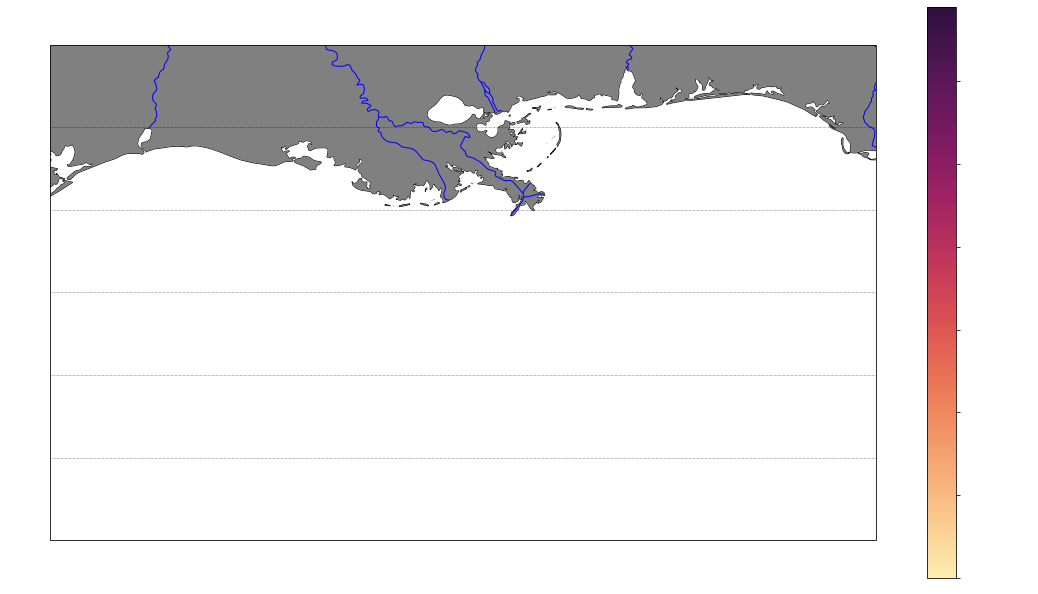

In [26]:
path = filenames[0] 
ds = load_satdata(path)

a = -0.0206
A = a * np.log(ds['Rrs_443'])
b = -0.6128
B = b * np.log(ds['Rrs_488'])
c = -0.0070
C = c * np.log(ds['Rrs_531'])
d = -0.4944
D = d * np.log(ds['Rrs_555'])
e = 0.9362
E = e * np.log(ds['Rrs_667'])
f = 0.9666
ln_aCDOM_300 = A + B + C + D + E + f
aCDOM_300 = np.exp(ln_aCDOM_300)
ds['aCDOM_300'] = aCDOM_300

fig, ax = plot_mapbase(extent)
satdata = ax.pcolormesh(ds['lon'], ds['lat'], ds['aCDOM_300'], cmap=cmo.matter, transform=ccrs.PlateCarree())
cb = fig.colorbar(satdata)
cb.ax.tick_params(labelcolor='w') 
cb.set_label('Surface Water\n'+'a$_{CDOM}$ (300 nm) (1/m)', size=20, weight='bold', color='w')
tick_font_size = 16
cb.ax.tick_params(labelsize=tick_font_size)

fig.set_size_inches(18.5, 10.5)
ds

In [7]:
#making the map

lat_top=31
lat_bot=25
lon_left=-85
lon_rigth=-95
extent=[lon_left, lon_rigth, lat_bot, lat_top]

def plot_mapbase(extent, res='10m', projection=ccrs.PlateCarree()):
    fig = plt.figure(figsize=(10,5)) # set fig size
    ax = fig.add_subplot(111, projection=projection)
    ax.set_extent(extent)
    ax.coastlines(res)
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='land',
                                                facecolor='grey', # change color here
                                                scale=res)) 
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='rivers_lake_centerlines',
                                                edgecolor='blue', # change color here
                                                facecolor='none',
                                                scale=res))
    gl = ax.gridlines(xlocs=np.arange(lon_left, lon_rigth+1),
                      ylocs=np.arange(lat_bot, lat_top+1),
                      draw_labels=True, 
                      linewidth=0.5, color='k', linestyle=':')
    gl.top_labels = gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 15, 'color': 'white'}
    gl.ylabel_style = {'size': 15, 'color': 'white'}
    return fig, ax

In [8]:
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black"}
plt.rcParams.update(params)

C:\Users\12532\miniconda3\envs\Bugs\lib\site-packages\xarray\core\computation.py:727: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
C:\Users\12532\miniconda3\envs\Bugs\lib\site-packages\xarray\core\computation.py:727: RuntimeWarning: invalid value encountered in logaddexp
  result_data = func(*input_data)
C:\Users\12532\miniconda3\envs\Bugs\lib\site-packages\xarray\core\computation.py:727: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
C:\Users\12532\miniconda3\envs\Bugs\lib\site-packages\xarray\core\computation.py:727: RuntimeWarning: invalid value encountered in logaddexp
  result_data = func(*input_data)
C:\Users\12532\miniconda3\envs\Bugs\lib\site-packages\xarray\core\computation.py:727: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
C:\Users\12532\miniconda3\envs\Bugs\lib\site-packages\xarray\core\computation.py:727: RuntimeWarning: invalid value encountered in logaddexp
  

C:\Users\12532\miniconda3\envs\Bugs\lib\site-packages\xarray\core\computation.py:727: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
C:\Users\12532\miniconda3\envs\Bugs\lib\site-packages\xarray\core\computation.py:727: RuntimeWarning: invalid value encountered in logaddexp
  result_data = func(*input_data)
C:\Users\12532\miniconda3\envs\Bugs\lib\site-packages\xarray\core\computation.py:727: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
C:\Users\12532\miniconda3\envs\Bugs\lib\site-packages\xarray\core\computation.py:727: RuntimeWarning: invalid value encountered in logaddexp
  result_data = func(*input_data)
C:\Users\12532\miniconda3\envs\Bugs\lib\site-packages\xarray\core\computation.py:727: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
C:\Users\12532\miniconda3\envs\Bugs\lib\site-packages\xarray\core\computation.py:727: RuntimeWarning: invalid value encountered in logaddexp
  

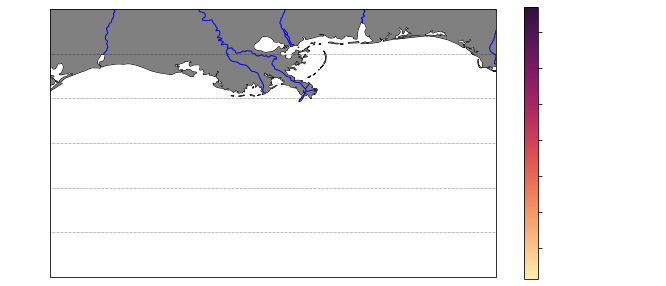

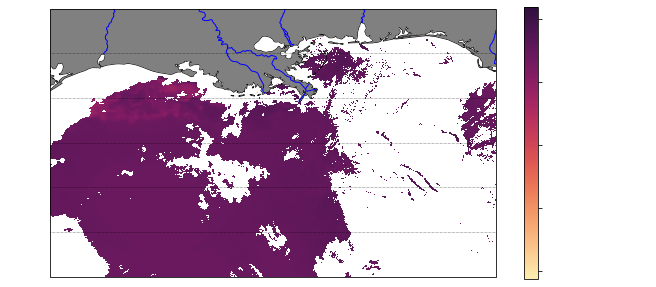

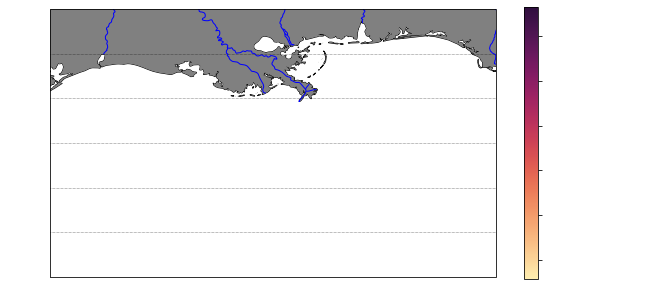

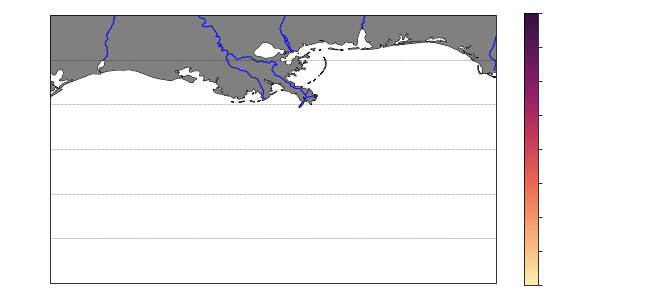

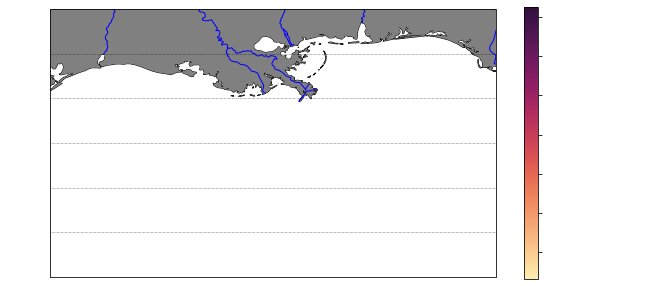

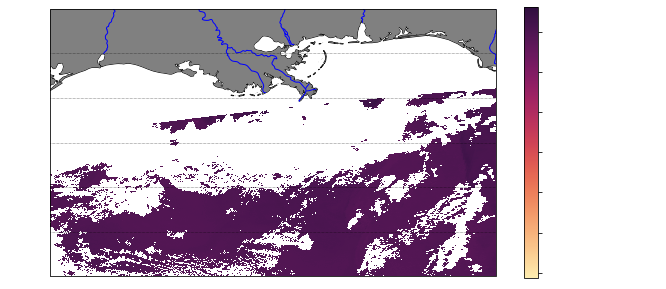

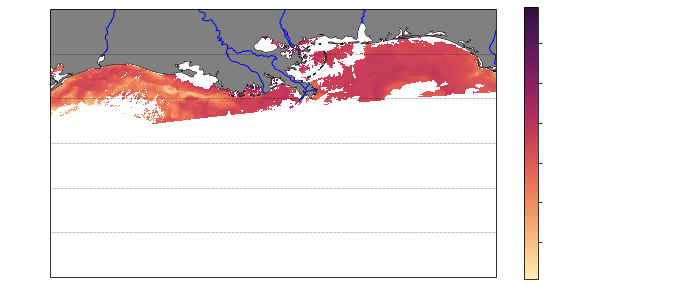

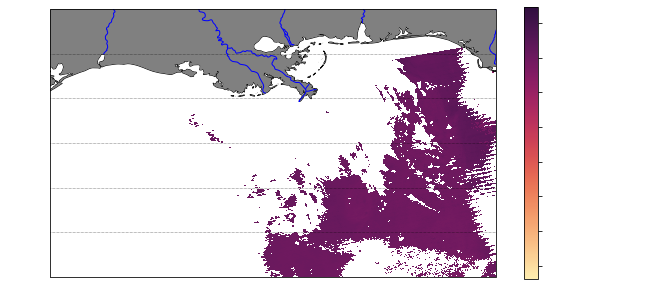

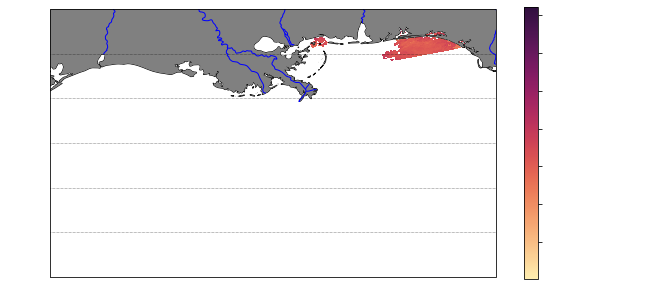

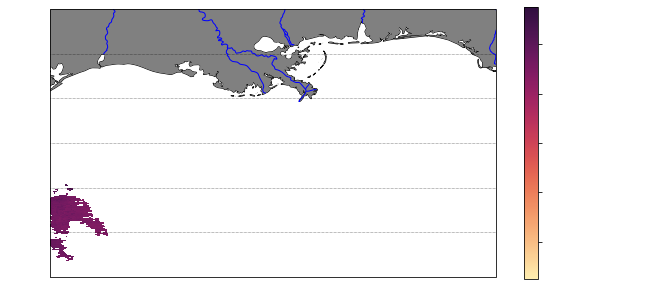

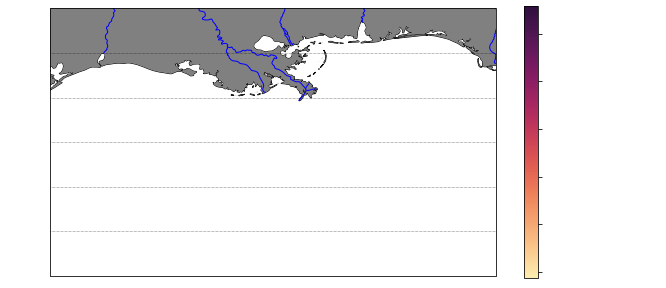

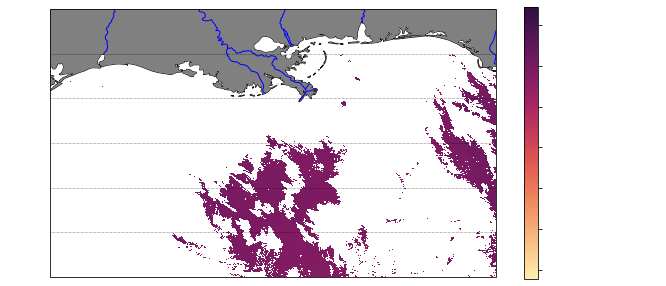

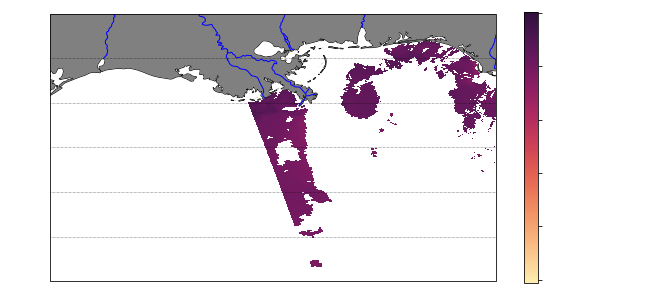

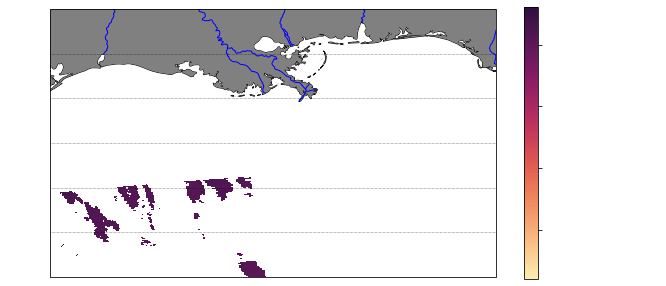

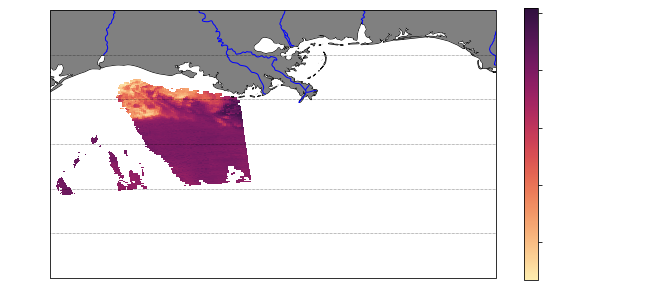

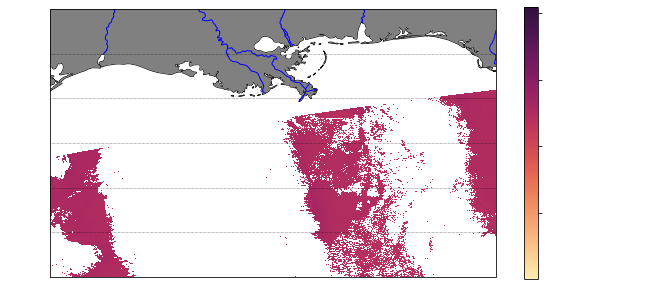

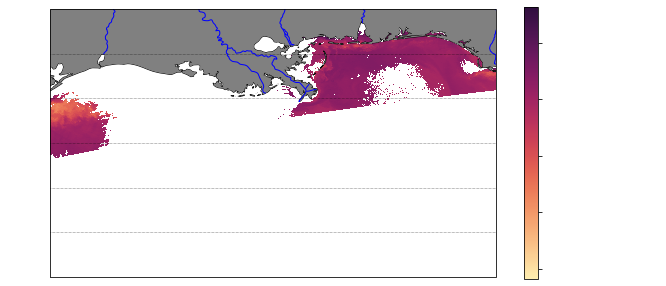

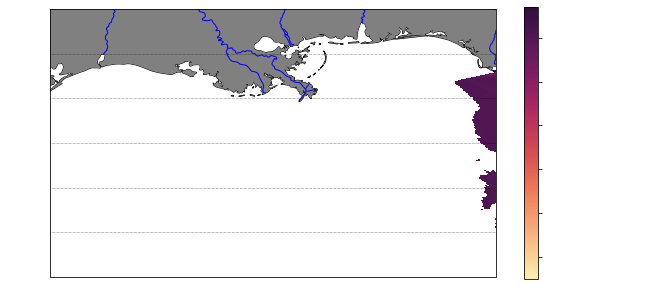

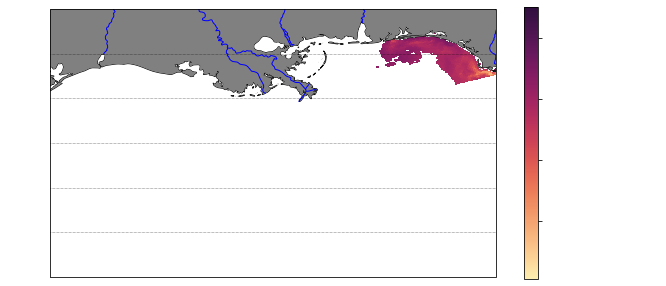

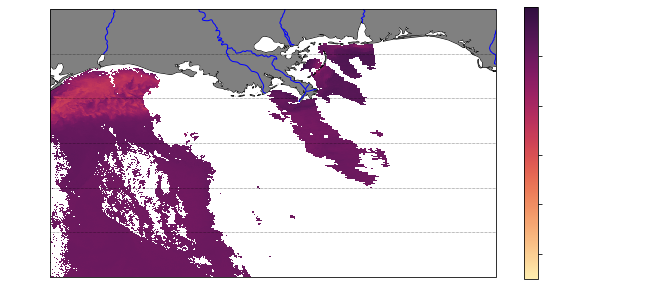

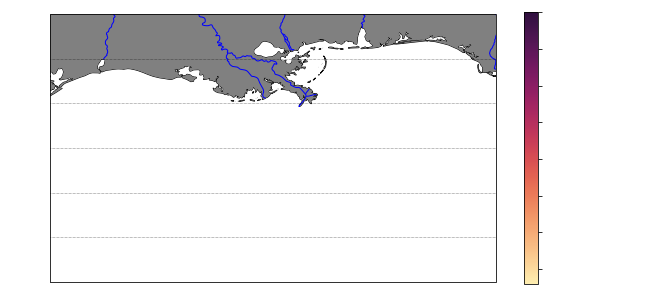

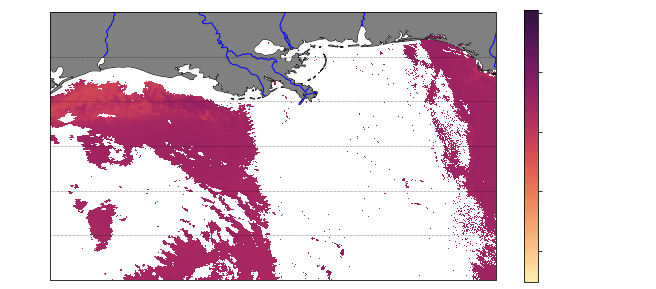

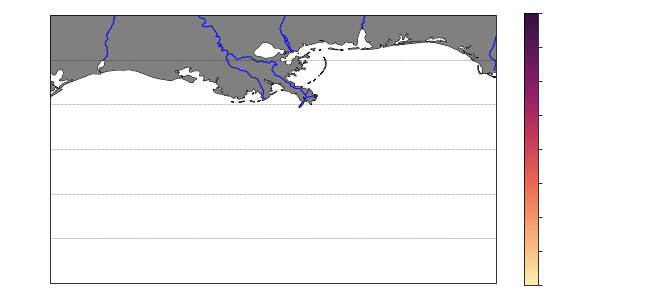

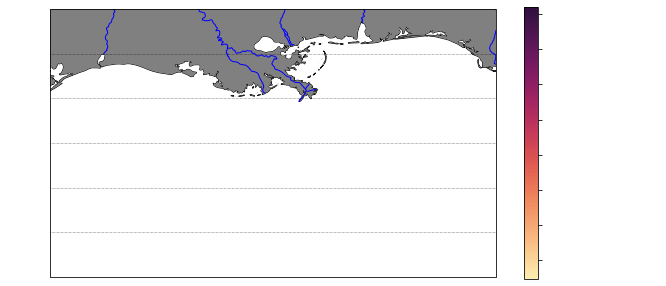

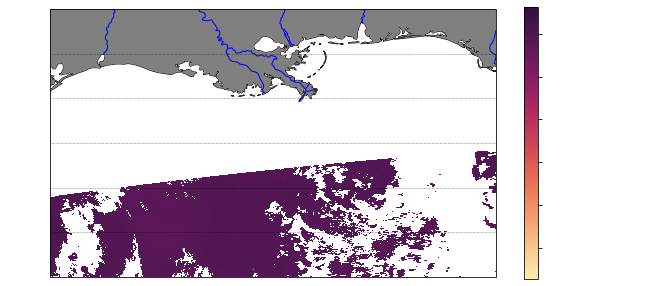

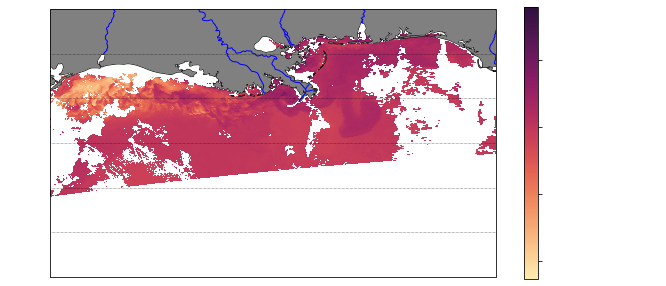

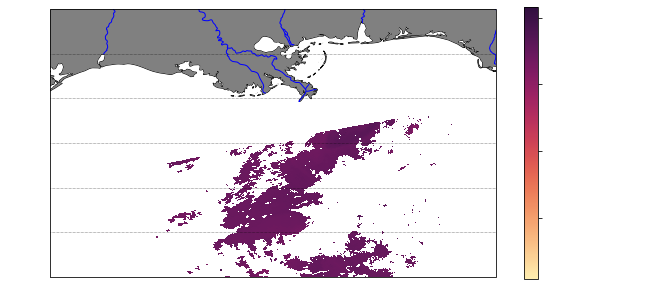

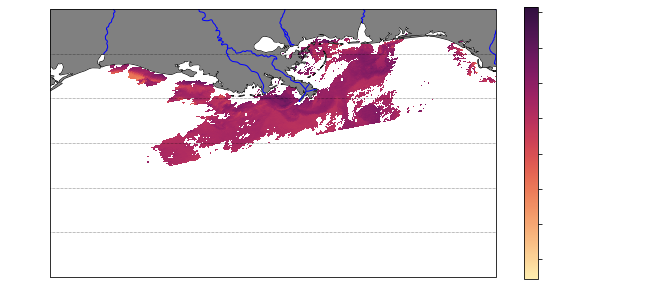

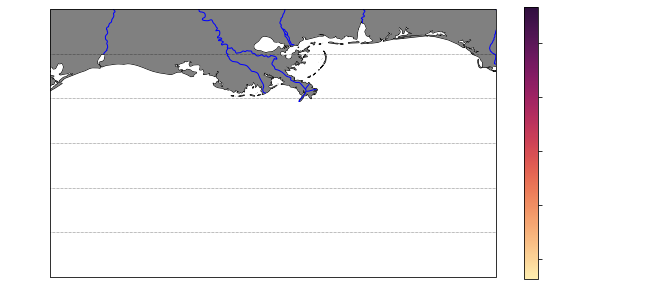

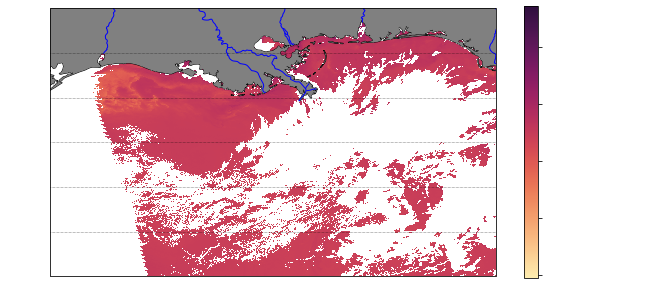

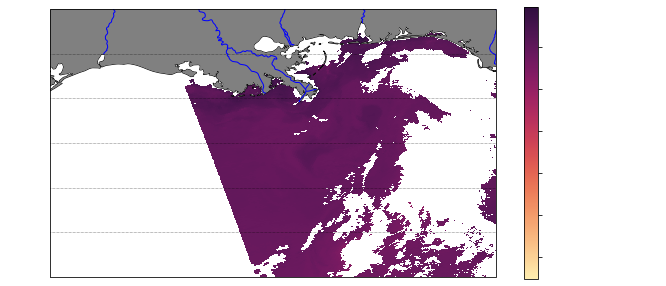

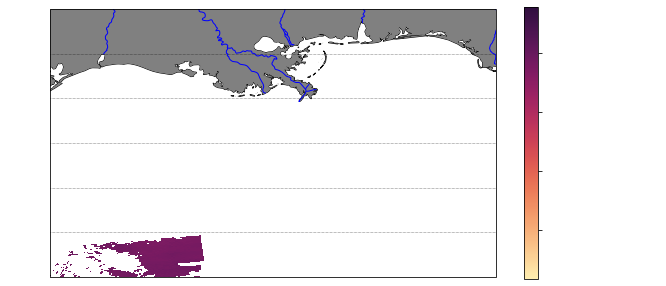

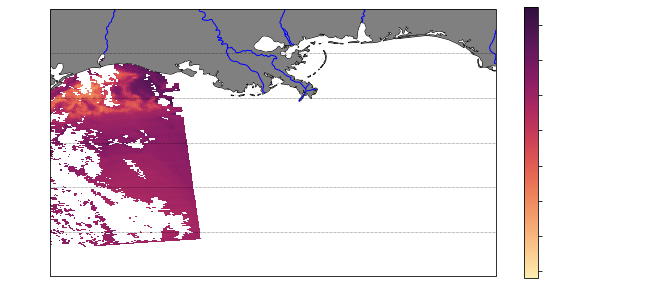

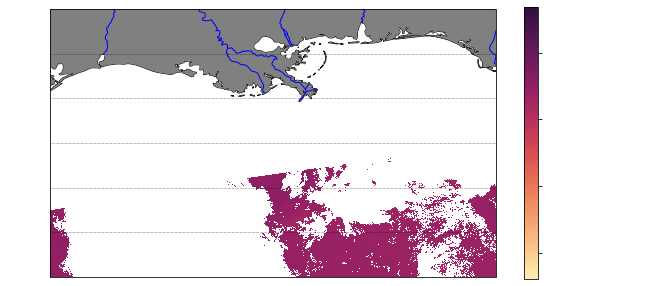

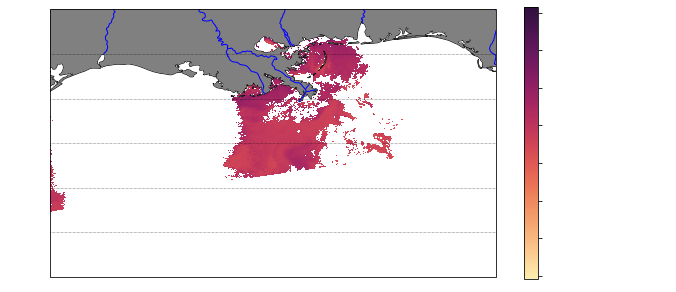

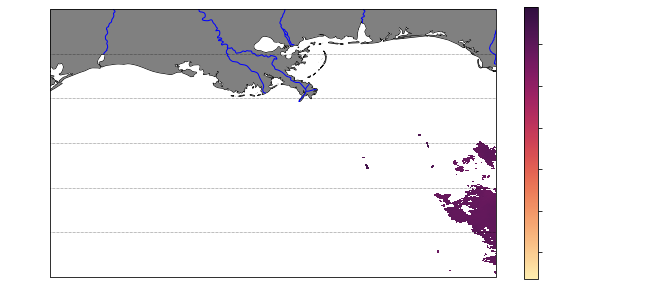

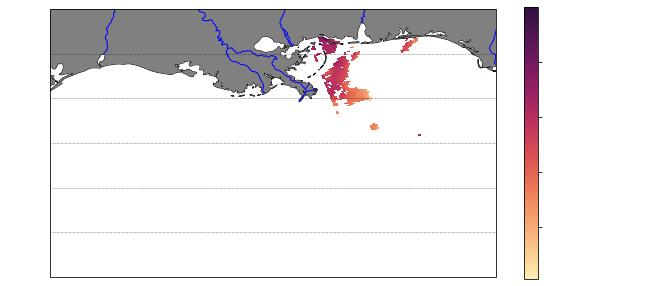

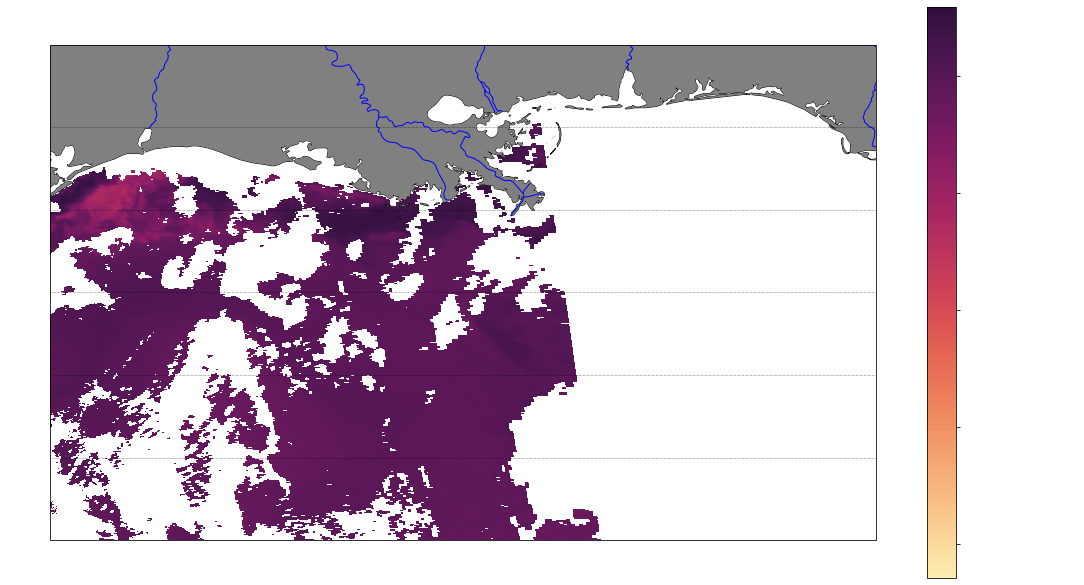

In [9]:
for file in filenames: 
    path = file 
    ds = load_satdata(path)
    ds = make_vars(ds)
    fig, ax = plot_mapbase(extent)
    satdata = ax.pcolormesh(ds['lon'], ds['lat'], ds['DOC'], cmap=cmo.matter, transform=ccrs.PlateCarree())
    cb = fig.colorbar(satdata)
    cb.ax.tick_params(labelcolor='w') 
    cb.set_label('Surface Water\n'+'a$_{CDOM}$ (300 nm) (1/m)', size=20, weight='bold', color='w')
    tick_font_size = 16
    cb.ax.tick_params(labelsize=tick_font_size)
    set_title = file
fig.set_size_inches(18.5, 10.5)